## Clean And Analyze Employee Exit Surveys

This project will look at datasets from the Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) in Queensland, Australia. We will seek to discover reasons for resignation from these datasets, which are exit surveys. Specifically, comparing dissatisfaction between short-term and long-term employment, and younger and older employees.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
dete_survey = pd.read_csv('dete-exit-survey-january-2014.csv')
tafe_survey = pd.read_csv('tafe-employee-exit-survey.csv')
import warnings
warnings.filterwarnings('ignore')

The datasets are available in public domain also, I have provided the link below

TAFE - https://data.gov.au/dataset/ds-qld-89970a3b-182b-41ea-aea2-6f9f17b5907e/details?q=exit%20survey

DETE - https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey

In [2]:
dete_survey.info()
dete_survey.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   ID                                   822 non-null    int64 
 1   SeparationType                       822 non-null    object
 2   Cease Date                           822 non-null    object
 3   DETE Start Date                      822 non-null    object
 4   Role Start Date                      822 non-null    object
 5   Position                             817 non-null    object
 6   Classification                       455 non-null    object
 7   Region                               822 non-null    object
 8   Business Unit                        126 non-null    object
 9   Employment Status                    817 non-null    object
 10  Career move to public sector         822 non-null    bool  
 11  Career move to private sector        822 non-

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [3]:
tafe_survey.info()
tafe_survey.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    int64  
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                                                                  

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,634133009996094000,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 – 30,Temporary Full-time,Administration (AO),1-2,1-2
1,634133654064531000,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,634138845606563000,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,634139903350000000,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,634146578511788000,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 – 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [4]:
print(dete_survey.isnull().sum())
print(tafe_survey.isnull().sum())

ID                                       0
SeparationType                           0
Cease Date                               0
DETE Start Date                          0
Role Start Date                          0
Position                                 5
Classification                         367
Region                                   0
Business Unit                          696
Employment Status                        5
Career move to public sector             0
Career move to private sector            0
Interpersonal conflicts                  0
Job dissatisfaction                      0
Dissatisfaction with the department      0
Physical work environment                0
Lack of recognition                      0
Lack of job security                     0
Work location                            0
Employment conditions                    0
Maternity/family                         0
Relocation                               0
Study/Travel                             0
Ill Health 

In [5]:
tafe_survey.shape

(702, 72)

Even at the beginning, we can tell that there are a few problems that will need to be examined more closely or fixed. In the DETE survey, there are several columns with non-trivial numbers of null values. However, some of these may just indicate that the column was not applicable to the survey responder (e.g. "Aboriginal": 806 missing values or "Disability": 799. The TAFE has bigger problems, in my opinion, in that the column names are all questions and essentially unreadable as they stand currently. A potential solution will be to melt together columns that have the same overal topic.

In [6]:
dete_survey = pd.read_csv("dete-exit-survey-january-2014.csv", na_values = "Not Stated")
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis = 1)
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis = 1)

- The dete_survey dataframe contains 'Not Stated' values that indicate values are missing, but they aren't represented as NaN.
- Both the dete_survey and tafe_survey dataframes contain many columns that we don't need to complete our analysis.

To start, we'll handle the first two issues. Recall that we can use the pd.read_csv() function to specify values that should be represented as NaN. We'll use this function to fix the missing values first. Then, we'll drop columns we know we don't need for our analysis.

In [7]:
dete_survey_updated.columns = dete_survey_updated.columns.str.lower().str.strip().str.replace(" ","_")
dete_survey_updated.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

Due to some inconsistant spacing issues in the cleaned up version of the TAFE survey provided by Dataquest, I stripped the columns of spaces. Moving forward when using columns from TAFE survey, enter columns with spaces removed or they will not be read. 

In [8]:
tafe_survey_updated.columns = tafe_survey_updated.columns.str.replace("\s+", "")
tafe_mapping = {'RecordID': 'id', 'CESSATIONYEAR': 'cease_date', 
               'Reasonforceasingemployment': 'separationtype', 
               'Gender.WhatisyourGender?': 'gender', 
               'CurrentAge.CurrentAge': 'age', 
               'EmploymentType.EmploymentType': 'employment_status',
               'Classification.Classification' : 'position', 
               'LengthofServiceOverall.OverallLengthofServiceatInstitute(inyears)': 'institute_service', 
               'LengthofServiceCurrent.LengthofServiceatcurrentworkplace(inyears)': 'role_service'}
tafe_survey_updated = tafe_survey_updated.rename(tafe_mapping, axis = 1)

In [9]:
print(tafe_survey_updated.head())

                   id                              Institute  \
0  634133009996094000  Southern Queensland Institute of TAFE   
1  634133654064531000            Mount Isa Institute of TAFE   
2  634138845606563000            Mount Isa Institute of TAFE   
3  634139903350000000            Mount Isa Institute of TAFE   
4  634146578511788000  Southern Queensland Institute of TAFE   

                   WorkArea  cease_date    separationtype  \
0  Non-Delivery (corporate)      2010.0  Contract Expired   
1  Non-Delivery (corporate)      2010.0        Retirement   
2       Delivery (teaching)      2010.0        Retirement   
3  Non-Delivery (corporate)      2010.0       Resignation   
4       Delivery (teaching)      2010.0       Resignation   

  ContributingFactors.CareerMove-PublicSector  \
0                                         NaN   
1                                           -   
2                                           -   
3                                           -   
4  

Because we eventually want to combine our two data sources, we'll have to standardize the column names. We used the DataFrame.columns attribute along with vectorized string methods to update all of the columns at once. These are not very user friendly tables especially the tafe survey. 

In [10]:
print(dete_survey_updated["separationtype"].value_counts())
print('\n')
print(tafe_survey_updated["separationtype"].value_counts())

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64


Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64


In [11]:
dete_resign = dete_survey_updated['separationtype'].str.contains('Resignation').copy()
dete_resignations = dete_survey_updated[dete_resign]

In [12]:
tafe_survey_updated = tafe_survey_updated.dropna(subset=["separationtype"])
print(tafe_survey_updated["separationtype"].isnull().sum())

0


In [13]:
tafe_resign = tafe_survey_updated['separationtype'].str.contains('Resignation').copy()
tafe_resignations = tafe_survey_updated[tafe_resign]

While attempting to select only the resignation data from the surveys, I ran into an issue with the tafe dataframe. Passing in boolean values was not working, and it turned out that there was a null value remaining in the column. The row appeared to be entirely null, so I decided to drop that row, fixing the issue.

In [14]:
print(dete_resignations['cease_date'].value_counts())

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2012      2
05/2013      2
09/2010      1
2010         1
07/2006      1
07/2012      1
Name: cease_date, dtype: int64


From the above exploration of value counts in the DETE Survey's cease_date column, we note that these values need to be cleaned in order to be able to work with the dates. Specifically, we will extract the year from these dates using regular expressions. To make things easier, we note that all cease dates belong to the current milennium.

In [15]:
dete_resignations['cease_year'] = dete_resignations['cease_date'].astype(str).str.extract(r'(2[0-9]{3})', expand = False)
dete_resignations['cease_year'] = dete_resignations['cease_year'].astype(float)
print('Unique cease years in DETE Survey:')
dete_resignations['cease_year'].value_counts().sort_index()

Unique cease years in DETE Survey:


2006.0      1
2010.0      2
2012.0    129
2013.0    146
2014.0     22
Name: cease_year, dtype: int64

In [16]:
dete_resignations['dete_start_date'].value_counts()

2011.0    24
2008.0    22
2007.0    21
2012.0    21
2010.0    17
2005.0    15
2004.0    14
2009.0    13
2006.0    13
2013.0    10
2000.0     9
1999.0     8
1996.0     6
2002.0     6
1992.0     6
1998.0     6
2003.0     6
1994.0     6
1993.0     5
1990.0     5
1980.0     5
1997.0     5
1991.0     4
1989.0     4
1988.0     4
1995.0     4
2001.0     3
1985.0     3
1986.0     3
1983.0     2
1976.0     2
1974.0     2
1971.0     1
1972.0     1
1984.0     1
1982.0     1
1987.0     1
1975.0     1
1973.0     1
1977.0     1
1963.0     1
Name: dete_start_date, dtype: int64

In [17]:
print('TAFE Cease Date Frequency Table: ')
tafe_resignations['cease_date'].value_counts().sort_index()

TAFE Cease Date Frequency Table: 


2009.0      2
2010.0     68
2011.0    116
2012.0     94
2013.0     55
Name: cease_date, dtype: int64

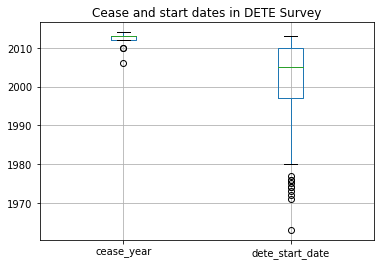

In [18]:
dete_resignations.boxplot(column = ['cease_year', 'dete_start_date'])
plt.title("Cease and start dates in DETE Survey")
plt.show()

As we can observe in the plot above, the date ranges in the DETE Survey sound reasonable and therefore we will not remove any rows in relation to this topic.

In [19]:
dete_resignations['institute_service'] = dete_resignations['cease_year'] - dete_resignations['dete_start_date']
dete_resignations['institute_service'].head()

3      7.0
5     18.0
8      3.0
9     15.0
11     3.0
Name: institute_service, dtype: float64

We need a column that details the length of service of the employee. We note that this column already exists for the TAFE Survey (institute_service), but not for the DETE Survey. Hence, we will use the start and cease dates in the DETE Survey to create an equivalent column.

## Identifying dissatisfaction
As a next step, we will identify the employees who resigned due to dissatisfaction with their job and categorize them as 'dissatisfied' from each dataframe. We will identify an employee as 'dissatisfied' if he or she indicated that any of the following factores caused her/him to resign.

### DETE Survey
- job_dissatisfaction
- dissatisfaction_with_the_department
- physical_work_environment
- lack_of_recognition
- lack_of_job_security
- work_location
- employment_conditions
- work_life_balance
- workload

### TAFE Survey
- Contributing Factors. Dissatisfaction
- Contributing Factors. Job Dissatisfaction

We will begin by categorizing the employees in the TAFE Survey. We observe that these columns only take two values, with '-' indicating that the variable was not a factor in the employee's decision to resign. We will change these values to True, False or NaN values by writing the following update_vals function.

In [23]:
tafe_resignations['ContributingFactors.Dissatisfaction'].value_counts()

-                                         277
Contributing Factors. Dissatisfaction      55
Name: ContributingFactors.Dissatisfaction, dtype: int64

In [24]:
tafe_resignations['ContributingFactors.JobDissatisfaction'].value_counts()

-                      270
Job Dissatisfaction     62
Name: ContributingFactors.JobDissatisfaction, dtype: int64

In [25]:
def update_vals(element):
    if pd.isnull(element):
        return np.nan
    elif element == '-':
        return False
    else:
        return True

In [28]:
tafe_factors = tafe_resignations[['ContributingFactors.Dissatisfaction', 'ContributingFactors.JobDissatisfaction']].applymap(update_vals)
tafe_resignations['dissatisfied'] = tafe_factors.any(axis = 1, skipna = False)

Next, we will apply the same process to the DETE Survey. Note that this Survey already has True/False values for each of the factors, so we can skip the above manipulation.

In [29]:
dete_resignations['dissatisfied'] = dete_resignations[['job_dissatisfaction', 'dissatisfaction_with_the_department', 
                                                          'physical_work_environment', 'lack_of_recognition', 
                                                          'lack_of_job_security', 'work_location', 
                                                          'employment_conditions', 'work_life_balance', 
                                                          'workload']].any(axis = 1, skipna = False)

In [30]:
dete_resignations_up = dete_resignations.copy()
tafe_resignations_up = tafe_resignations.copy()

### Combining both datasets for analysis
Next, we will combine the TAFE and DETE Surveys. For this purpose, we will add a column named institute to identify which institue the employee worked at.

In [31]:
dete_resignations_up['institute'] = 'DETE'
tafe_resignations_up['institute'] = 'TAFE'
combined = pd.concat([dete_resignations_up, tafe_resignations_up], ignore_index = True, sort = False)
combined_updated = combined.dropna(thresh = 500, axis = 1)

Below, we find the first rows of the combined dataset. We have kept the columns detailing employee ID, separation type, cease date, position, employment status, gender, age, years of service and institute.

In [32]:
combined_updated.head()

,id,separationtype,cease_date,position,employment_status,gender,age,institute_service,dissatisfied,institute
0,4,Resignation-Other reasons,05/2012,Teacher,Permanent Full-time,Female,36-40,7,False,DETE
1,6,Resignation-Other reasons,05/2012,Guidance Officer,Permanent Full-time,Female,41-45,18,True,DETE
2,9,Resignation-Other reasons,07/2012,Teacher,Permanent Full-time,Female,31-35,3,False,DETE
3,10,Resignation-Other employer,2012,Teacher Aide,Permanent Part-time,Female,46-50,15,True,DETE
4,12,Resignation-Move overseas/interstate,2012,Teacher,Permanent Full-time,Male,31-35,3,False,DETE


### Analysis
Now that we have cleaned, combined dataset, we will look into the analytical goals that were set at the beginning of this project. Since we are interested in the effect that years of service has on resignation reasons, we begin by cleaning this column. We will convert its numbers into the following categories to be able to analyze the data:
- New: Less than 3 years at a company
- Experienced: 3-6 years at a company
- Established: 7-10 years at a company
- Veteran: 11 or more years at a company

In [33]:
combined_updated['institute_service'].value_counts()

Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
0.0                   20
3.0                   20
6.0                   17
4.0                   16
2.0                   14
9.0                   14
7.0                   13
More than 20 years    10
8.0                    8
13.0                   8
20.0                   7
15.0                   7
10.0                   6
12.0                   6
14.0                   6
17.0                   6
22.0                   6
16.0                   5
18.0                   5
11.0                   4
24.0                   4
23.0                   4
19.0                   3
21.0                   3
39.0                   3
32.0                   3
25.0                   2
26.0                   2
28.0                   2
30.0                   2
36.0                   2
27.0                   1


First, we'll extract the years of service from each value in the institute_service column. Then we will create a function to categorize a new column titled 'service_cat'.

In [35]:
years_service = combined_updated['institute_service'].astype(str).str.extract(r'([0-9][0-9]?)').astype(float)

In [36]:
def categorize(val):
    if pd.isnull(val):
        return np.nan
    elif val < 3:
        return 'New'
    elif (val >= 3) and (val < 6):
        return 'Experienced'
    elif (val >= 6) and (val <= 10):
        return 'Established'
    else:
        return 'Veteran'        

In [37]:
service_cat = years_service[0].apply(categorize)
final = combined_updated.copy()
final['service_cat'] = service_cat

In [38]:
final.head()

,id,separationtype,cease_date,position,employment_status,gender,age,institute_service,dissatisfied,institute,service_cat
0,4,Resignation-Other reasons,05/2012,Teacher,Permanent Full-time,Female,36-40,7,False,DETE,Established
1,6,Resignation-Other reasons,05/2012,Guidance Officer,Permanent Full-time,Female,41-45,18,True,DETE,Veteran
2,9,Resignation-Other reasons,07/2012,Teacher,Permanent Full-time,Female,31-35,3,False,DETE,Experienced
3,10,Resignation-Other employer,2012,Teacher Aide,Permanent Part-time,Female,46-50,15,True,DETE,Veteran
4,12,Resignation-Move overseas/interstate,2012,Teacher,Permanent Full-time,Male,31-35,3,False,DETE,Experienced


In [39]:
final['dissatisfied'].value_counts(dropna = False)

False    403
True     240
True       8
Name: dissatisfied, dtype: int64

In [40]:
final.isnull().sum()

id                    0
separationtype        0
cease_date           16
position             53
employment_status    54
gender               59
age                  55
institute_service    88
dissatisfied          8
institute             0
service_cat          88
dtype: int64

In [41]:
final['dissatisfied'] = final['dissatisfied'].fillna(False)

In [42]:
final.isnull().sum()

id                    0
separationtype        0
cease_date           16
position             53
employment_status    54
gender               59
age                  55
institute_service    88
dissatisfied          0
institute             0
service_cat          88
dtype: int64

In [43]:
pivot_final = final.pivot_table(index = 'service_cat', values = 'dissatisfied')

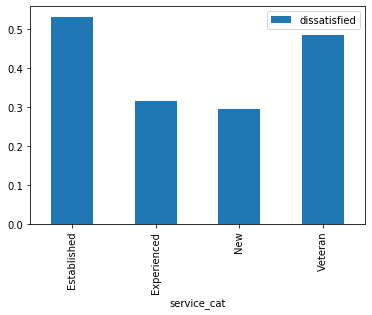

In [44]:
pivot_final.plot(kind = 'bar')

As seen above, we see that employees tend to resign due to dissatisfaction primarily when they are Established and Veterans. That is, the employees who have been at the insitute for the longest time are those who tend to resign due to dissatisfaction. This is highly reasonable, seeing as New and Experienced employees (those with less than 11 years at the institute) are in the process of developing their careers at the insitutes and tend to have higher opportunities for mobility.

### Conclusions
In this report, we performed several data cleaning tasks in order to explore the relation between employee dissatisfaction when resigning and years of service at two institutes. We found that, on average, employees that report dissatisfaction as a reason for resigning tend to be those with the highest amount of years working at the company, that is, established and veteran employees. Further analysis could be performed to explore differences across institutes (DETE and TAFE), a more granular analysis on reasons for dissatisfaction and employee position.